1. Dataset:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C



2. Jumlah baris: 891, Jumlah kolom: 12

3. Data Fitur:


,Name,Sex,Age,Pclass,Fare
0,"Braund, Mr. Owen Harris",male,22.0,3,7.2500
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,71.2833
2,"Heikkinen, Miss. Laina",female,26.0,3,7.9250
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,53.1000
4,"Allen, Mr. William Henry",male,35.0,3,8.0500
...,...,...,...,...,...
886,"Montvila, Rev. Juozas",male,27.0,2,13.0000
887,"Graham, Miss. Margaret Edith",female,19.0,1,30.0000
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,3,23.4500
889,"Behr, Mr. Karl Howell",male,26.0,1,30.0000



4. Kolom Kelas:


,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1



5. Data Fitur + Relatives:


,Name,Sex,Age,Pclass,Fare,Relatives
0,"Braund, Mr. Owen Harris",male,22.0,3,7.2500,1
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,71.2833,1
2,"Heikkinen, Miss. Laina",female,26.0,3,7.9250,0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,53.1000,1
4,"Allen, Mr. William Henry",male,35.0,3,8.0500,0
...,...,...,...,...,...,...
886,"Montvila, Rev. Juozas",male,27.0,2,13.0000,0
887,"Graham, Miss. Margaret Edith",female,19.0,1,30.0000,0
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,3,23.4500,3
889,"Behr, Mr. Karl Howell",male,26.0,1,30.0000,0



6. Jumlah penumpang berdasarkan Pclass:


,Jumlah Penumpang
1,216
2,184
3,491



7. Jumlah penumpang berdasarkan Sex:


,Jumlah Penumpang
male,577
female,314



8. Jumlah penumpang selamat dan tidak selamat berdasarkan Pclass:


,Tidak Selamat (0),Selamat (1)
Pclass,,
1,80,136
2,97,87
3,372,119


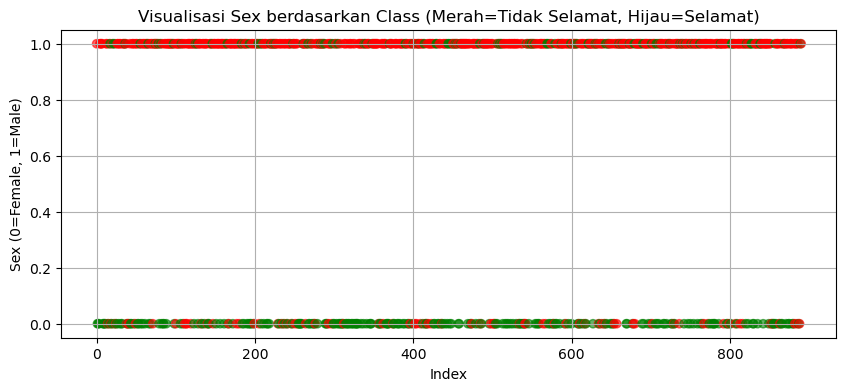

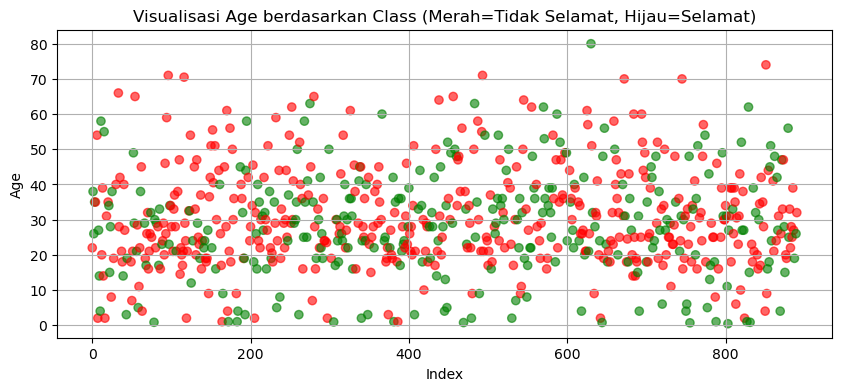

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load dataset
df = pd.read_csv('titanic.csv')
print("1. Dataset:")
display(df)

# 2. Jumlah baris dan kolom
rows, cols = df.shape
print(f"\n2. Jumlah baris: {rows}, Jumlah kolom: {cols}")

# 3. Ambil kolom fitur (Name, Sex, Age, Pclass, Fare)
fitur = df[['Name', 'Sex', 'Age', 'Pclass', 'Fare']]
print("\n3. Data Fitur:")
display(fitur)

# 4. Ambil kolom kelas (Survived)
kelas = df[['Survived']]
print("\n4. Kolom Kelas:")
display(kelas)

# 5. Tambahkan fitur Relatives = SibSp + Parch
fitur = df[['Name', 'Sex', 'Age', 'Pclass', 'Fare']].copy()
fitur['Relatives'] = df['SibSp'] + df['Parch'] 
print("\n5. Data Fitur + Relatives:")
display(fitur)

# 6. Hitung jumlah penumpang pada masing-masing nilai Pclass
pclass_count = df['Pclass'].value_counts().sort_index()
print("\n6. Jumlah penumpang berdasarkan Pclass:")
display(pclass_count.to_frame(name='Jumlah Penumpang'))

# 7. Hitung jumlah penumpang berdasarkan Sex
sex_count = df['Sex'].value_counts()
print("\n7. Jumlah penumpang berdasarkan Sex:")
display(sex_count.to_frame(name='Jumlah Penumpang'))

# 8. Hitung jumlah penumpang yang selamat dan tidak selamat berdasarkan Pclass
survival_by_class = df.groupby(['Pclass', 'Survived']).size().unstack(fill_value=0)
survival_by_class.columns = ['Tidak Selamat (0)', 'Selamat (1)']
print("\n8. Jumlah penumpang selamat dan tidak selamat berdasarkan Pclass:")
display(survival_by_class)

# 9. Visualisasi class berdasarkan urutan data dan y = Sex
plt.figure(figsize=(10, 4))
colors = df['Survived'].map({0: 'red', 1: 'green'})
plt.scatter(df.index, df['Sex'].astype('category').cat.codes, c=colors, alpha=0.6)
plt.title('Visualisasi Sex berdasarkan Class (Merah=Tidak Selamat, Hijau=Selamat)')
plt.xlabel('Index')
plt.ylabel('Sex (0=Female, 1=Male)')
plt.grid(True)
plt.show()

# 10. Visualisasi class berdasarkan urutan data dan y = Age (tanpa missing value)
df_age = df.dropna(subset=['Age'])
plt.figure(figsize=(10, 4))
colors_age = df_age['Survived'].map({0: 'red', 1: 'green'})
plt.scatter(df_age.index, df_age['Age'], c=colors_age, alpha=0.6)
plt.title('Visualisasi Age berdasarkan Class (Merah=Tidak Selamat, Hijau=Selamat)')
plt.xlabel('Index')
plt.ylabel('Age')
plt.grid(True)
plt.show()
